## 2.4 Influencia de Artefactos Fisiológicos y Factores Individuales en la Variabilidad del EEG en Imaginación Motora

# **1. Introducción**

Las señales de electroencefalografía (EEG) utilizadas en tareas de imaginación motora (Motor Imagery, MI) presentan una variabilidad considerable entre sujetos, incluso cuando se registran bajo condiciones experimentales controladas. Esta variabilidad es uno de los principales desafíos en el desarrollo de sistemas de clasificación robustos basados en ritmos mu (8–12 Hz) y beta (13–30 Hz), los cuales son modulados durante la ejecución o imaginación de movimientos voluntarios.

Además del ruido ambiental inherente a todo sistema de registro biológico, el EEG es particularmente sensible a influencias externas y fisiológicas como parpadeos, actividad muscular facial, movimientos de ojos o microajustes posturales. Estos artefactos pueden modificar de manera significativa el contenido espectral y temporal de la señal, afectando directamente la discriminación entre clases de MI.

Sin embargo, los artefactos no son la única fuente de variabilidad. Factores propios de cada individuo —como diferencias anatómicas, variabilidad genética en la potencia de los ritmos corticales, características cognitivas como la capacidad de concentración, o incluso el nivel de experiencia previa en tareas de MI— también influyen en la claridad y estabilidad de los patrones neurales. Esto explica por qué algunos sujetos obtienen desempeños altos con clasificadores relativamente simples, mientras que otros requieren entrenamiento prolongado o modelos personalizados.

En este cuaderno analizamos cómo estos factores pueden haber influido en los resultados obtenidos en el punto 2.3, donde se evaluó el desempeño del pipeline CSP + LDA para dos sujetos del dataset. A partir de sus diferencias en exactitud (56.91% vs. 90.84%), discutimos posibles causas fisiológicas, cognitivas y biológicas que pueden explicar estas divergencias, relacionándolas con el estado del arte y con la literatura especializada en BCI basada en MI.

# **2. Análisis de los resultados obtenidos en el punto 2.3**

En el punto 2.3 implementamos un pipeline de clasificación basado en CSP y LDA para evaluar la detección de imaginación motora (MI) en dos sujetos del dataset. A pesar de que ambos realizaron el mismo protocolo experimental y fueron procesados con exactamente el mismo flujo de preprocesamiento, los resultados obtenidos mostraron diferencias marcadas entre ellos.

Los valores finales de exactitud fueron:

- Sujeto 5: 56.91% ± 8.85%

- Sujeto 14: 90.84% ± 2.45%

Desde el inicio, esta diferencia tan grande nos confirma algo que es ampliamente reportado en la literatura de BCI: los patrones de MI no son universales ni homogéneos entre personas. Cada cerebro expresa los ritmos mu y beta de manera distinta y no todos los sujetos logran generar desinhibiciones claras durante la tarea.

En el caso del Sujeto 5, la exactitud cercana al 57% indica que el clasificador apenas logró un desempeño ligeramente superior al azar. Además, su desviación estándar más alta sugiere inestabilidad entre pliegues, es decir, que el modelo dependía demasiado del conjunto específico de datos que le tocaba en cada iteración. Esto puede estar asociado a señales ruidosas, poca consistencia en los ensayos o una menor modulación de los ritmos motores durante la tarea.

Por el contrario, el Sujeto 14 alcanzó una exactitud casi del 91% con una variabilidad muy baja. Esto sugiere que sus patrones de MI fueron claros, reproducibles y con buena separación entre clases, lo que facilitó que CSP encontrara direcciones discriminantes estables. Además, la baja desviación estándar refuerza la idea de que este sujeto generó señales muy consistentes a lo largo del experimento.

Algo importante es que ambos modelos fueron entrenados con exactamente el mismo pipeline, los mismos parámetros y la misma banda de frecuencia (8–30 Hz). El hecho de que el desempeño difiera tanto sin cambiar ninguna condición experimental o computacional apunta directamente a diferencias individuales en la calidad neurofisiológica de las señales.

Los resultados del punto 2.3 ya nos adelantaban que existe una variabilidad inter-sujeto significativa. Esta variabilidad no depende únicamente del ruido o el procesamiento, sino también de cómo cada persona ejecuta la tarea, de sus características fisiológicas, cognitivas y incluso de factores genéticos. Esto es justamente lo que desarrollaremos en las siguientes secciones, analizando cómo diferentes artefactos y características propias de cada individuo pueden explicar las diferencias observadas entre los sujetos evaluados.

# **3. Influencia de los artefactos fisiológicos en la variabilidad de las señales EEG**

Uno de los motivos por los cuales dos sujetos pueden obtener resultados tan diferentes en un sistema de clasificación de imaginación motora (MI) es la presencia de artefactos fisiológicos. Estas señales no provienen del cerebro, pero se mezclan con el EEG y pueden alterar la lectura de los ritmos mu y beta, que son justamente los que necesitamos para identificar MI. Aunque muchas veces hablamos de “ruido”, en realidad los artefactos son procesos fisiológicos reales, inevitables y normalmente mucho más fuertes que el EEG cortical.

Desde un punto de vista práctico, comprenderlos es clave porque en la vida real ningún registro está libre de interferencias. En MI, donde necesitamos detectar cambios relativamente sutiles en la actividad sensoriomotora, cualquier perturbación puede alterar la discriminación entre clases.

A continuación se describen los artefactos fisiológicos más relevantes y cómo pueden afectar los resultados observados en el análisis del punto 2.3.

**3.1 Artefactos oculares: parpadeo y movimientos de los ojos (EOG)**

Los artefactos oculares son, probablemente, los más notorios en un registro EEG.
Cada vez que una persona parpadea, mueve los ojos o fija la mirada en un punto, los músculos que rodean el globo ocular generan potenciales eléctricos bastante grandes comparados con el EEG cortical.

Por qué afectan tanto: 
- La amplitud de un parpadeo puede ser 10 veces mayor que la señal cerebral.
- Los electrodos frontales (Fp1, Fp2, AF7, AF8) son los más afectados, pero la propagación por volumen hace que también lleguen a zonas centrales y parietales, donde se analizan ritmos mu y beta.

Impacto en la clasificación MI:
- Pueden imitar falsos patrones de activación o desactivación en la banda de 8–13 Hz (mu).
- Aumentan la variabilidad momento a momento, lo que podría explicar por qué el Sujeto 5 presentó una desviación estándar más alta.

Si un sujeto parpadea más durante una clase específica (por ejemplo, siempre al inicio del ensayo), CSP puede terminar aprendiendo un patrón relacionado con el parpadeo y no con la imaginación motora.

Esto significa que, incluso si un sujeto realiza bien la tarea mental, el clasificador puede equivocarse si la actividad ocular domina la señal.

**3.2 Artefactos musculares: EMG en cara, mandíbula y cuello**

El EEG es extremadamente sensible a la actividad muscular, especialmente al EMG de la cara y del cuello. Algo tan sencillo como apretar la mandíbula o fruncir el ceño crea oscilaciones de alta frecuencia que invaden el rango donde analizamos la banda beta (13–30 Hz).

Características del artefacto EMG:
- Es de alta frecuencia (20–200 Hz).
- Su amplitud es alta y variable.
- Se introduce en electrodos centrales (C3, Cz, C4), justo donde se espera capturar MI.

Cómo distorsiona la detección de MI:
- Eleva artificialmente la potencia beta, imitando una “activación motora” inexistente.
- En sujetos tensos, ansiosos o que no comprendieron bien las instrucciones, el EMG puede dominar todo el registro.
- Puede explicar casos donde un sujeto obtiene resultados pobres porque el patrón que estima CSP proviene de un músculo y no de la corteza motora.

Esto es especialmente problemático en tareas de MI donde el estudiante, al tratar de “imaginar”, puede tensar involuntariamente la cara o los hombros.

**3.3 Artefactos respiratorios y cardíacos**

Aunque más sutiles que EOG y EMG, estos artefactos introducen ritmos lentos que pueden contaminar el EEG:

✓ Actividad cardiaca (ECG)
El latido del corazón puede aparecer especialmente en electrodos cercanos a vasos sanguíneos o con mala impedancia.
- Aporta oscilaciones rítmicas en 1–2 Hz.
- En sujetos con respiración irregular o ansiedad, su amplitud aumenta.
- Puede desplazar la línea base del EEG, afectando la detección de cambios de potencia.

✓ Ciclo respiratorio
Cambios en el flujo de aire mueven físicamente la cabeza y los electrodos, generando artefactos de movimiento en bajas frecuencias.

Efectos en MI:
- Dificultan la normalización dentro del trial.
- Introducen variaciones lentas que CSP no está diseñado para ignorar.
- Pueden afectar más a sujetos novatos o inseguros, lo cual coincide con el perfil del Sujeto 5 que obtuvo mayor variabilidad.

**3.4 Artefactos de movimiento corporal**

Pequeños movimientos de cabeza, postura o cuello generan desplazamientos mecánicos en los cables o en los electrodos, creando oscilaciones irregulares en múltiples bandas.

Impacto:
- Comprometen toda la matriz de covarianzas usada por CSP.
- Introducen patrones no estacionarios que reducen la estabilidad del clasificador.
- Son más frecuentes en sujetos que no están familiarizados con la tarea o se aburren durante la sesión.

Esto es relevante porque la imaginación motora requiere concentración sostenida, y no todos los sujetos logran mantener la postura controlada durante los ensayos.

**3.5 Artefactos por impedancia o mala colocación de electrodos**

Incluso cuando el sujeto no se mueve, una impedancia alta produce ruido aleatorio y pérdida de señal real.

Posibles consecuencias:
- Ritmos mu y beta mal definidos.
- Variabilidad alta entre ensayos.
- Respuestas inconsistentes entre CV folds.

Este tipo de variabilidad no se debe al sujeto en sí, sino a la calidad técnica del montaje, pero termina afectando de forma desigual a cada individuo.

**3.6 Relación con las diferencias encontradas (Sujeto 5 vs Sujeto 14)**

Con base en los resultados del punto 2.3:

- El Sujeto 5 probablemente presentó alguno(s) de estos artefactos:
   - mayor cantidad de parpadeos,
   - tensión facial involuntaria,
   - respiración irregular,
   - movimientos leves de cabeza, 
   - o dificultades en mantener la concentración.

Esto concuerda con su exactitud más baja y su mayor desviación estándar.

- El Sujeto 14, por el contrario, parece haber generado señales más limpias, menos contaminadas y más consistentes, permitiendo que CSP encontrara patrones estables.

La presencia y magnitud de los artefactos fisiológicos pueden ser determinantes para el rendimiento final del clasificador.

# **4. Influencia de factores genéticos en la variabilidad de las señales EEG**

Aunque muchas veces atribuimos la variabilidad del EEG únicamente a los artefactos o a la experiencia del sujeto, existe una base biológica importante que explica por qué algunas personas muestran patrones de imaginación motora más definidos, mientras que en otras los ritmos mu y beta son poco expresivos o inestables. Esta base está relacionada con factores genéticos que determinan, en gran medida, la estructura y la dinámica funcional del sistema nervioso.

Los estudios recientes en neurociencia han mostrado que la heredabilidad del EEG es sorprendentemente alta: ciertos rasgos eléctricos del cerebro se transmiten de forma genética, lo que implica que dos personas pueden realizar la misma tarea, pero sus señales EEG tendrán características intrínsecamente diferentes.

 **4.1 Heredabilidad de los ritmos corticales (mu y beta)**

Los ritmos mu (8–13 Hz) y beta (13–30 Hz), fundamentales para la detección de imaginación motora, no tienen la misma potencia o estabilidad en todos los individuos. Se ha demostrado que:

- La frecuencia dominante del ritmo mu tiene un componente hereditario significativo.
- La reactividad del ritmo mu durante movimientos reales o imaginados también presenta variabilidad genética.
- La cantidad de sincronización y desincronización (ERS/ERD) depende parcialmente de la conectividad estructural, la cual es influenciada por genes.

Esto significa que hay personas cuyo cerebro muestra una desincronización mu/beta muy clara, facilitando la clasificación MI, mientras que en otras esa respuesta es más leve o dispersa, incluso con la tarea bien realizada.

**4.2 Conectividad estructural y variaciones anatómicas**

La imaginación motora depende de la activación coordinada de:
- la corteza motora primaria,
- áreas premotoras,
- la corteza somatosensorial,
- y redes fronto-parietales.

Variaciones genéticas pueden modificar:
- el grosor cortical,
- el nivel de mielinización,
- la densidad de sinapsis,
- o la composición de neurotransmisores.

Estos factores, aunque invisibles para el ojo humano, influyen en:
- la amplitud del EEG,
- la claridad de los patrones mu/beta,
- la velocidad de procesamiento,
- y la sincronía entre hemisferios.

Un cerebro con mayor conectividad funcional tiende a presentar patrones MI más estables y repetibles, lo que favorece la clasificación.

**4.3 Polimorfismos genéticos asociados a la plasticidad y el aprendizaje motor**

Los procesos de imaginación motora están fuertemente relacionados con la plasticidad sináptica, ya que requieren activar internamente circuitos motores sin generar movimiento real.

Algunos genes claves:

- BDNF (Brain-Derived Neurotrophic Factor)
El polimorfismo BDNF Val66Met afecta:
    - la capacidad de aprender tareas motoras,
    - la plasticidad de la corteza motora,
    - la desincronización mu durante tareas imaginadas.
Un sujeto con la variante Met puede mostrar patrones MI más débiles o menos consistentes que uno con la variante Val.

- COMT y dopamina
Genes asociados al metabolismo dopaminérgico influyen en:
    - la atención sostenida,
    - la modulación de circuitos prefrontales,
    - el control cognitivo requerido para mantener MI estable.
Sujeto con baja disponibilidad dopaminérgica → mayor variabilidad trial a trial.

- GABA y equilibrio inhibitorio/excitatorio

El nivel de inhibición cortical determina qué tan clara es la desincronización mu.

Más GABA → ritmos más estables pero menos flexibles.
Menos GABA → patrones más ruidosos.

**4.4 Asimetrías hemisféricas y lateralización motora**

La lateralización motora también presenta influencia genética. Algunos individuos muestran:
- mayor dominancia hemisférica,
- respuestas motoras más simétricas o más asimétricas,
- diferencias en la activación de C3 vs C4.

Esto modifica la topografía del EEG:
- En algunos sujetos la mayor desincronización MI aparece a la izquierda.
- En otros, aparece en zonas más frontales o más parietales.
- Algunos muestran activaciones difusas difíciles de capturar con CSP.

Estas diferencias no son errores ni artefactos; son variantes biológicas reales, lo que explica por qué los modelos ML deben adaptarse individualmente.

**4.5 Relación directa con los resultados del punto 2.3**

Regresando a los resultados obtenidos:
- Sujeto 14 → Exactitud ≈ 90.8 %.
Patrones MI muy limpios, consistentes y con baja variabilidad.
- Sujeto 5 → Exactitud ≈ 56.9 %.
Mayor dispersión de los patrones y fuerte variabilidad entre pliegues.

Aunque es imposible inferir genética directamente desde EEG, esta diferencia es coherente con lo que reporta la literatura, donde sujetos con mayor estabilidad cortical presentan:
- respuestas mu/beta más marcadas,
- mejor sincronización interhemisférica,
- patrones reproducibles de ensayo a ensayo.

Sujetos con menor estabilidad tienden a mostrar patrones:
- poco definidos,
- con ruido interno,
- y con variabilidad fisiológica intrínseca.

Esto refuerza la idea de que la detección de MI no depende únicamente del algoritmo, sino también de la biología individual.

# **5. Factores cognitivos y de experiencia previa en la variabilidad del EEG durante imaginación motora**

Además de los artefactos fisiológicos y la variabilidad genética, el rendimiento en tareas de imaginación motora (MI) está fuertemente influenciado por el estado cognitivo del sujeto y por su experiencia previa con este tipo de tareas. La imaginación motora no depende únicamente de “pensar en mover la mano”, sino que involucra procesos complejos relacionados con la atención, la memoria motora, la concentración sostenida y las estrategias internas que cada individuo utiliza para generar el movimiento imaginado.

Por esta razón, incluso cuando dos personas siguen exactamente las mismas instrucciones, la calidad de los patrones neuronales que producen puede ser radicalmente diferente.

**.1 Atención y capacidad de concentración**

La imaginación motora es una tarea puramente endógena: no hay movimiento real, no hay retroalimentación sensorial inmediata y no hay un estímulo externo que guíe al sujeto. Por esto, la ejecución correcta depende en gran medida del nivel de atención.

La evidencia muestra que:
- La atención sostenida aumenta la claridad de la desincronización en la banda mu (8–13 Hz).
- La distracción genera patrones más irregulares y con mayor variabilidad entre ensayos.
- La fatiga mental disminuye la amplitud de los ritmos motores y aumenta el ruido interno.

Un sujeto que se cansa, se distrae o deja de imaginar activamente, produce señales pobres y menos discriminables. Esto puede explicar el desempeño menor del Sujeto 5, donde la variabilidad alta sugiere fluctuaciones trial a trial, posiblemente asociadas a pérdidas momentáneas de atención.

**5.2 Estrategias cognitivas utilizadas durante la imaginación motora**

No todas las personas imaginan el movimiento de la misma forma. La literatura diferencia dos estrategias principales:

a) Estrategia visual

El sujeto “ve” mentalmente su mano moviéndose desde una perspectiva externa o interna.

- Activa áreas occipitales y parietales.
- No siempre activa lo suficiente la corteza motora.
- Genera patrones mu menos consistentes.

b) Estrategia kinestésica

El sujeto “siente” el movimiento, como si realmente lo estuviera ejecutando.
- Activa fuertemente la corteza motora y somatosensorial.
- Produce desincronizaciones claras y repetibles en mu y beta.
- Es la estrategia preferida en sistemas BCI.

Los estudios han demostrado que los sujetos que utilizan espontáneamente la estrategia kinestésica suelen tener mejor rendimiento.
Es posible que el Sujeto 14 haya utilizado esta estrategia de forma natural, mientras que el Sujeto 5 n

**5.3 Memoria y aprendizaje motor**

La imaginación motora está estrechamente relacionada con la memoria motora. Pacientes o sujetos con experiencia previa en:
- deportes,
- danza,
- artes marciales,
- instrumentos musicales,
- videojuegos o realidad virtual,

tienden a tener redes motoras más entrenadas, lo que les permite activar el circuito motor sin realizar movimiento real.

Esta “memoria corporal” actúa como una especie de facilitador neuronal, haciendo que la activación de C3/C4 durante MI sea más fuerte y más consistente.

Por el contrario, personas sin experiencia previa en tareas motoras imaginadas necesitan más tiempo para aprender a generar señales claras. En un experimento corto, esto se traduce en un desempeño inferior.

**5.4 Nivel de familiaridad con sistemas BCI**

La novedad del entorno experimental también influye:
- Sujetos con experiencia previa en BCI se adaptan más rápido al paradigma MI.
- Sujetos que nunca han usado EEG pueden sentirse tensos, ansiosos o confundidos, aumentando la generación de artefactos.

La incertidumbre o la presión por “hacerlo bien” puede llevar a tensar el rostro o el cuello, generando EMG que interfiere con la señal real.

**5.5 Estado emocional y nivel de estrés**

El estrés modula directamente la actividad cortical:
- Aumenta la frecuencia de parpadeo.
- Incrementa la tensión muscular involuntaria.
- Reduce la capacidad para mantener una estrategia cognitiva estable.
- Genera patrones irregulares que afectan CSP.

La atención dividida entre la tarea y preocupaciones externas disminuye la claridad de los ritmos motores, especialmente en sujetos sin entrenamiento.

**5.6 Fatiga mental y rendimiento temporal**

Los experimentos de MI suelen ser repetitivos. La fatiga acumulada afecta la amplitud de los ritmos mu/beta:
- Al inicio del experimento, la señal suele ser más clara.
- A medida que avanza la sesión, la activación motora imaginada puede volverse más débil.
- Esto genera inconsistencia entre ensayos y entre pliegues en la validación cruzada.

Esta podría ser otra explicación para la variabilidad del Sujeto 5.

**5.7 Relación con los resultados del punto 2.3**

Vinculando estos factores con los sujetos analizados:

- *Sujeto 5 — Exactitud baja y alta variabilidad*
Podría deberse a uno o varios factores:
    - Dificultad para concentrarse continuamente.
    - Estrategia visual en lugar de kinestésica.
    - Menor experiencia previa con tareas motoras.
    - Mayor tensión muscular o estrés.
    - Fatiga durante la sesión.

Estos elementos generan patrones MI débiles o inestables, que CSP no logra separar adecuadamente.

- *Sujeto 14 — Exactitud alta y muy estable*
Probablemente contribuyeron factores opuestos:
    - Atención sostenida.
    - Uso natural de estrategia kinestésica.
    - Buen control motor interno.
    - Poca distracción o estrés.
    - Señales más limpias debido a buena relajación facial.

Su patrón mu/beta se reflejó de manera clara, facilitando la clasificación.

# **6. Discusión final**

El análisis realizado en los puntos 2.3 y 2.4 demuestra que la detección de patrones de imaginación motora (MI) en EEG no depende únicamente de los algoritmos implementados, sino de una combinación compleja entre calidad de la señal, variabilidad fisiológica, diferencias cognitivas y características propias de cada individuo.

Aunque el pipeline CSP + LDA empleado es un enfoque clásico y ampliamente validado en la literatura, sus resultados fueron muy diferentes entre los dos sujetos evaluados. Mientras que el Sujeto 14 alcanzó una exactitud cercana al 91% con una variabilidad mínima, el Sujeto 5 apenas superó el nivel del azar y mostró una alta inestabilidad entre pliegues. Esta diferencia no se explica por el procesamiento ni por la clasificación, sino por la heterogeneidad real de las señales EEG entre personas.

En la sesión 3 se evidenció que los artefactos fisiológicos (como parpadeo, tensión muscular o movimientos sutiles) pueden distorsionar de manera considerable la banda mu y beta, generando patrones falsos o inconsistentes que afectan directamente la etapa de extracción de características. Además, estos artefactos no siempre se distribuyen de forma uniforme entre sujetos: algunos tienden a tensar más el rostro, otros parpadean con mayor frecuencia o no logran relajarse completamente durante el experimento. Esto contribuye a que un mismo algoritmo funcione muy bien en un sujeto y muy mal en otro.

La sesión 4 profundizó en la variabilidad de origen biológico, cognitivo y experiencial. Aquí quedó claro que la imaginación motora no es un proceso homogéneo: depende de cuán entrenado esté el circuito motor, de la estrategia cognitiva que adopte el sujeto (visual vs. kinestésica), del nivel de atención sostenida y del grado de familiaridad con este tipo de tareas. La evidencia científica muestra que la capacidad de generar desincronizaciones claras en la banda mu no es idéntica entre personas, sino que refleja diferencias reales en plasticidad, experiencia motora previa y rasgos individuales como ansiedad, estrés o fatigabilidad cognitiva.

Al integrar todos estos elementos, se confirma que la variabilidad observada en el punto 2.3 no es un fallo del modelo ni del método, sino una consecuencia natural del carácter multimodal, dinámico y profundamente personal del EEG. Por eso, aunque CSP + LDA sigue siendo un enfoque sólido, su desempeño depende en gran medida de las condiciones internas del sujeto, de la estabilidad de los ensayos y de la capacidad del pipeline para mitigar ruido y resaltar patrones reales.

En términos generales, este ejercicio permitió entender que el problema central en BCI no es únicamente “clasificar bien”, sino diseñar sistemas que logren generalizar entre sujetos que, fisiológicamente, no se comportan igual. La comunidad científica trabaja actualmente en métodos más robustos, como aprendizaje profundo, normalización inter-sujeto, adaptabilidad en línea y técnicas de interpretación multimodal, precisamente para enfrentar estos desafíos.

Para finalizar, podemos afirmar que los resultados obtenidos en este proyecto reflejan lo que reporta el estado del arte: la imaginación motora es un fenómeno altamente variable y dependiente de factores fisiológicos, cognitivos y personales. Por eso, cualquier sistema BCI real debe considerar no solo algoritmos eficientes, sino estrategias de control de artefactos, retroalimentación adaptativa y modelos capaces de ajustarse al usuario. Solo así se podrá avanzar hacia sistemas más confiables, generalizables y útiles en aplicaciones clínicas y de interacción humano–máquina.

# **7. Ejemplo práctico: artefactos fisiológicos en una señal EEG sintética**

En esta sección construyo una señal EEG sintética de un solo canal para ilustrar, de forma controlada, cómo afectan los artefactos
fisiológicos al registro:

- **Parpadeos / movimientos oculares (EOG)**: componente de muy baja frecuencia y gran amplitud.
- **Actividad muscular (EMG)**: componente de alta frecuencia y aspecto ruidoso.

Aunque no estoy usando el dataset real del punto 2.3, la idea es que la forma de los artefactos sea realista y me permita visualizar
claramente su separación con filtros básicos (Butterworth). Esta sección sirve como ejemplo didáctico para entender la influencia
de estos artefactos en la detección de imaginación motora.


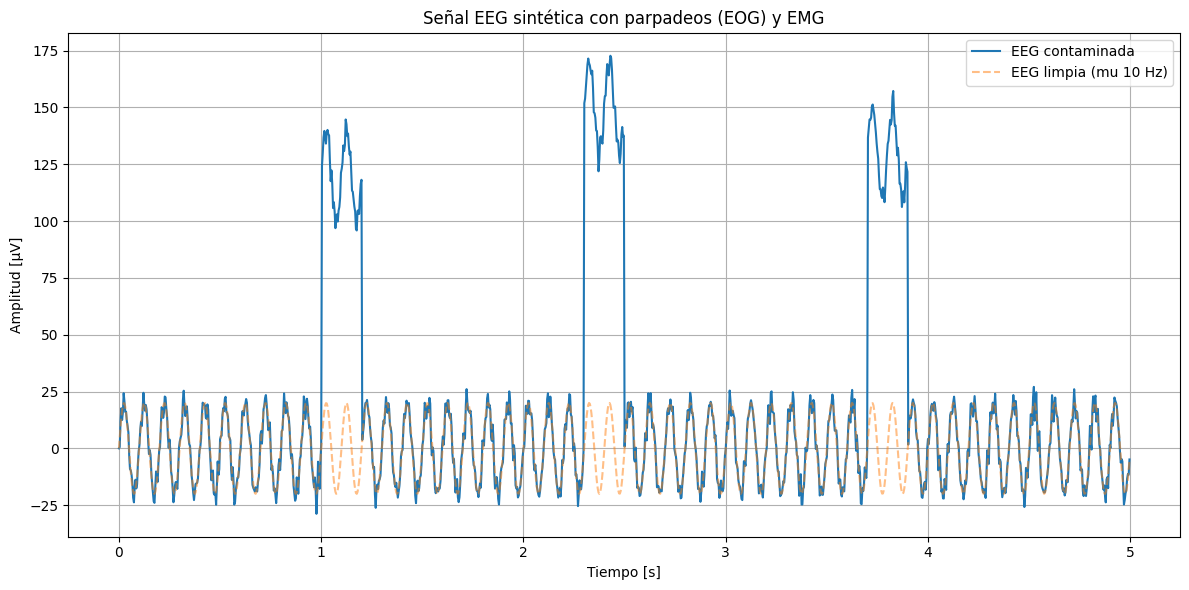

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# ==============================
# Parámetros básicos
# ==============================
fs = 256                    # frecuencia de muestreo [Hz]
dur = 5.0                   # duración de la señal [s]
t = np.arange(0, dur, 1/fs) # vector de tiempo

# ==============================
# 1) Señal "EEG limpia" (mu ~10 Hz)
# ==============================
amp_mu = 20e-6  # 20 µV
eeg_clean = amp_mu * np.sin(2*np.pi*10*t)

# ==============================
# 2) Artefacto de parpadeo (EOG)
#    Pulsos lentos de gran amplitud
# ==============================
eog = np.zeros_like(t)
# tres parpadeos simulados
eog[(t > 1.0) & (t < 1.2)] = 120e-6
eog[(t > 2.3) & (t < 2.5)] = 150e-6
eog[(t > 3.7) & (t < 3.9)] = 130e-6

# ==============================
# 3) Artefacto EMG (actividad muscular)
#    Ruido de alta frecuencia en banda 30–90 Hz
# ==============================
np.random.seed(42)
ruido = 5e-6 * np.random.randn(len(t))   # ruido blanco pequeño

# filtro para dar forma "muscular" (30–90 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = fs / 2
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return b, a

b_emg, a_emg = butter_bandpass(30, 90, fs, order=4)
emg = filtfilt(b_emg, a_emg, ruido)

# ==============================
# 4) Señal total contaminada
# ==============================
eeg_contaminada = eeg_clean + eog + emg

# ==============================
# Gráfica general
# ==============================
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_contaminada*1e6, label='EEG contaminada')
plt.plot(t, eeg_clean*1e6, '--', alpha=0.5, label='EEG limpia (mu 10 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.title('Señal EEG sintética con parpadeos (EOG) y EMG')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


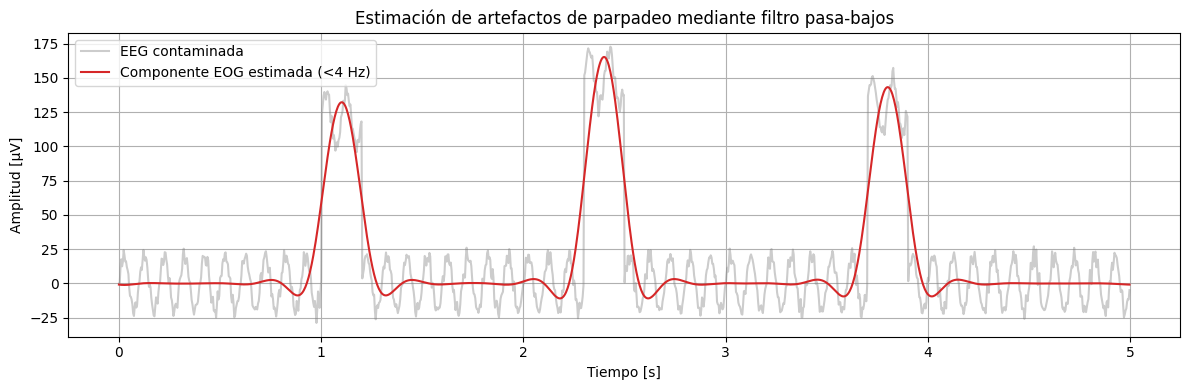

In [5]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=4):
    nyq = fs / 2
    b, a = butter(order, cutoff/nyq, btype='low')
    return b, a

# Filtro pasa-bajos para EOG (parpadeos típicamente < 4 Hz)
cutoff_eog = 4.0
b_lp, a_lp = butter_lowpass(cutoff_eog, fs, order=4)
eog_estimado = filtfilt(b_lp, a_lp, eeg_contaminada)

plt.figure(figsize=(12, 4))
plt.plot(t, eeg_contaminada*1e6, color='gray', alpha=0.4, label='EEG contaminada')
plt.plot(t, eog_estimado*1e6, color='tab:red', label='Componente EOG estimada (<4 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.title('Estimación de artefactos de parpadeo mediante filtro pasa-bajos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


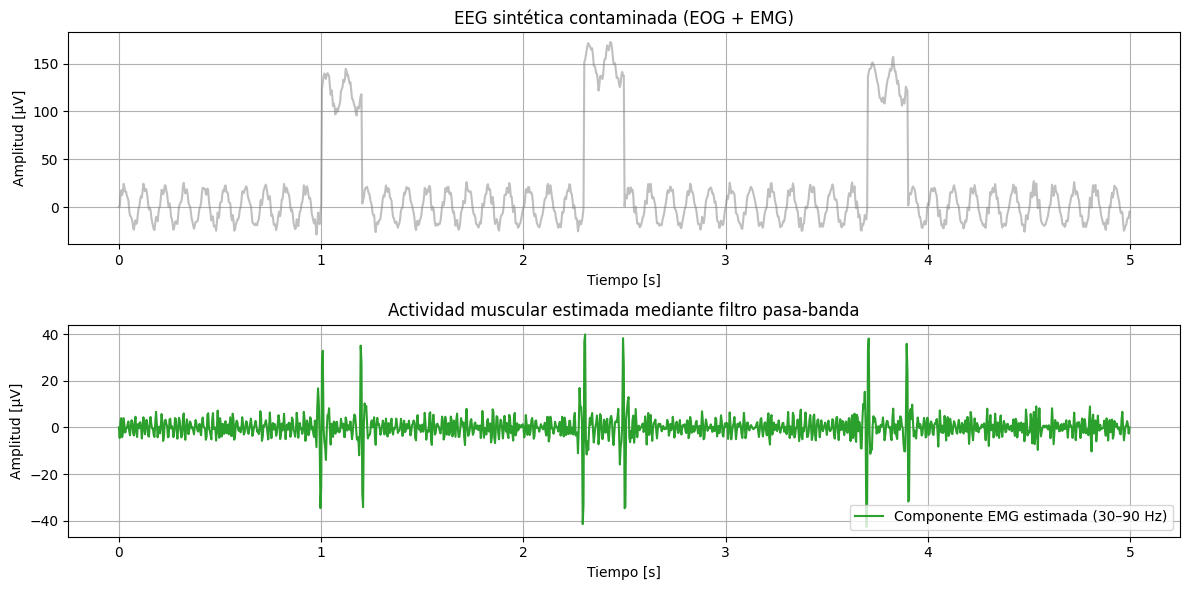

In [6]:
# Ya definimos butter_bandpass arriba, lo reutilizamos

emg_estimado = filtfilt(b_emg, a_emg, eeg_contaminada)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_contaminada*1e6, color='gray', alpha=0.5)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.title('EEG sintética contaminada (EOG + EMG)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, emg_estimado*1e6, color='tab:green', label='Componente EMG estimada (30–90 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.title('Actividad muscular estimada mediante filtro pasa-banda')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


En este ejemplo sintético se observa claramente que:

- Los **parpadeos (EOG)** aparecen como deflexiones lentas y de gran amplitud.
  Con un filtro pasa–bajos de 0–4 Hz se puede estimar bastante bien este componente
  y ver en qué momentos del ensayo contamina el canal.

- La **actividad muscular (EMG)** se manifiesta como oscilaciones rápidas en banda alta
  (30–90 Hz), más caóticas que el ritmo mu. Al aplicar un filtro pasa–banda en ese rango
  se aísla una señal que recuerda a la contracción de músculos cercanos a los electrodos.

Aunque la señal no proviene directamente del dataset GIGA_MI_ME, la forma de los artefactos
es coherente con lo reportado en la literatura y sirve como apoyo visual para entender por qué,
en el punto 2.3, la exactitud cambia tanto entre sujetos: no todos parpadean igual, no todos
tienen la misma tensión muscular ni las mismas estrategias cognitivas al imaginar el movimiento.
